In [8]:
import tensorflow as tf
import numpy as np
import json
import pandas as pd
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import speech_recognition as sr
import pyttsx3
import subprocess as s
import datetime
from datetime import time
import os
import sqlite3
import nltk
import string
# nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# nltk.download('stopwords')
# nltk.download('punkt')

stop_words={'but', 'aren', 'by', 'during', "isn't", "won't", 'through', 'only', 'up', 'we', 'o', 'very', 'off', 'here', 'hasn', 
            'does', 'that', "shouldn't", 'wasn', 'of', 'shan', 'yourselves', 'my', 'd', "you'd", 'further', 'too', "that'll", 
            'these', 'or', 'before', 'each', 'm', 'all', 'at', "didn't", "doesn't", 'be', 'the', 'are', 'been', 'being', 'didn'
            , 'if', 'their', 'until', 'i', 'hadn', 'against', 'to', 'once', 'your', 'am', 'just', 'again', 'with', 'while', 
            'between', "needn't", 'a', "it's", 'where', 'themselves', 'after', 'don', 'ma', 'when', "mustn't", 'ours', 'can',
            "hasn't", 'both', 'is', 'under', 'have', 't', 'he', 'she', 'will', 'hers', 'were', 'own', "mightn't", 
            'doing', 'shouldn', 'herself', 'wouldn', 'above', 'yours', 've', "don't", 'an', 'any', 'same', 'no', 'do',
            'there', 'nor', 'some', "weren't", 'our', 'll', 'did', 'should', "aren't", 'won', 're', 'not', 'this', 'than', 
            's', 'has', 'had', "should've", 'what', "couldn't", 'then', 'haven', 'into', 'from', "shan't", 'y', 'such',
            'below', 'few', 'they', 'having', 'her', "wasn't", 'was', 'needn', 'ourselves', "you've", "wouldn't", 
            'on', 'over', 'because', 'as', "haven't", 'its', 'you', 'isn', "she's", 'those', "hadn't", 'more', 'myself',
            'him', 'which', 'it', 'weren', "you'll", 'for', 'himself', 'and', 'itself', 'now', 'doesn', 'other', 'me', 'them',
            'out', 'ain', "you're", 'most', 'could not', 'his', 'mightn', 'who', 'in', 'so', 'whom', 'yourself', 'why', 'theirs',
            'mustn', 'down',"tell"}

In [10]:
%%writefile content.json
{
  "intents": [
    {
"tag": "greeting",
"patterns": ["Hi?", "Hey", "How are you","hi there","hello"],
"responses": ["Hello", "hi,what i can help u","hii how are you"]
},
     {
"tag": "college name",
"patterns": ["what is the college name","about your college","name college"],
"responses": ["SNJB's Late Sau. Kantabai Bhavarlalji Jain College of Engineering,Chandwad"]
},
      
      {
"tag": "department name",
"patterns": ["Deparment name","stream name","field name","how many department college","count department name","available department"],
"responses": ["There are total six deparments in our college including Computer , Mechanical, Civil , E & TC , AIDS , MBA etc."]
},
       {
"tag": "department count,number",
"patterns": ["tell me count of ","stream name","field name","how many department college","count department name","available department"],
"responses": ["There are total six deparments in our college including Computer , Mechanical, Civil , E & TC , AIDS , MBA etc."]
},
      {
"tag": "vision and mission",
"patterns": ["Vision of Mission college","vision and mission of college "],
"responses": ["Vision of Our college is Transform young aspirant learners towards creativity and professionalism for societal growth through quality technical education.  and Mission is To share values, ideas, beliefs by encouraging faculties and students for welfare of society."]
},
      {
"tag": "year",
"patterns": ["established year of college","when college is started"],
"responses": ["2003"]
},
      {
"tag": "principal",
"patterns": ["principal name of college","about principal"],
"responses": ["Dr.M.D.Kokate is Principal of SNJB's KBJ College of Engineering Chandwad"]
},
      {
"tag": "library",
"patterns": ["library information","information about library","information of library"],
"responses": ["We have an excellent, attractive and pleasant ambiance library in the college. Library is located at first floor & Second floor of college building, having total area of 490 sq. mtr."]
},
      {
"tag": "Placement",
"patterns": ["placement information 2021 and 2022","about placement"],
"responses": ["in 2021 22 placement count was 38 candidates from computer department, in 2020 21 placement count was 48 cag"]
},
       {
"tag": "vice principal",
"patterns": ["name of vice principal","about vice principal"],
"responses": ["Sanghavi Sir is vice principle of SNJB's KBJ College of Engineering Chandwad"]
},
       {
"tag": "computer department lab",
"patterns": ["how many labs in computer department","Number of labs in computer department","count of computer depatment lab"],
"responses": ["Total 12 Labs are available in computer department"]
}
  ]
}

Overwriting content.json


In [ ]:
tag:

In [11]:
with open("content.json") as content:
    data1=json.load(content)

In [12]:
data1

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi?', 'Hey', 'How are you', 'hi there', 'hello'],
   'responses': ['Hello', 'hi,what i can help u', 'hii how are you']},
  {'tag': 'college name',
   'patterns': ['what is the college name',
    'about your college',
    'name college'],
   'responses': ["SNJB's Late Sau. Kantabai Bhavarlalji Jain College of Engineering,Chandwad"]},
  {'tag': 'department name',
   'patterns': ['Deparment name',
    'stream name',
    'field name',
    'how many department college',
    'count department name',
    'available department'],
   'responses': ['There are total six deparments in our college including Computer , Mechanical, Civil , E & TC , AIDS , MBA etc.']},
  {'tag': 'vision and mission',
   'patterns': ['Vision of Mission college', 'vision and mission of college '],
   'responses': ['Vision of Our college is Transform young aspirant learners towards creativity and professionalism for societal growth through quality technical education.  an

In [13]:
tags=[]

responses={}
patt=[]
filter_sentence = []
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['patterns']:
        patt.append(lines)
        tags.append(intent['tag'])

# # stop_words = set(stopwords.words('english'))
# filter_sentence = [w for w in ntokens if not w.lower() in stop_words]
# for ntokens in patterns:
#     word_tokens = word_tokenize(ntokens)
#     filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#     #with no lower case conversion
#     filtered_sentence = []
#     for w in word_tokens:
#         if w not in stop_words:
#             filtered_sentence.append(w)
#             patt.append(str(" ".join([c for c in filter_sentence])))
    
# patt
patt

['Hi?',
 'Hey',
 'How are you',
 'hi there',
 'hello',
 'what is the college name',
 'about your college',
 'name college',
 'Deparment name',
 'stream name',
 'field name',
 'how many department college',
 'count department name',
 'available department',
 'Vision of Mission college',
 'vision and mission of college ',
 'established year of college',
 'when college is started',
 'principal name of college',
 'about principal',
 'library information',
 'information about library',
 'information of library',
 'placement information 2021 and 2022',
 'about placement',
 'name of vice principal',
 'about vice principal',
 'how many labs in computer department',
 'Number of labs in computer department',
 'count of computer depatment lab']

In [14]:
# tags=[]
# patterns=[]
# responses=[]
# for intent in data1['intents']:
# #      responses[intent['tag']]=intent['responses']
#     for res in intent['responses']:
#         for lines in intent['patterns']:
#             patterns.append(lines)
#             responses.append(res)
#             tags.append(intent['tag'])
        
patterns=[]
for i in patt:  
    word_tokens = word_tokenize(i)
    # converts the words in word_tokens to lower case and then checks whether 
    #they are present in stop_words or not
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    #with no lower case conversion
    filtered_sentence = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    patterns.append(" ".join(filtered_sentence))
    

patterns

['Hi ?',
 'Hey',
 'How',
 'hi',
 'hello',
 'college name',
 'about college',
 'name college',
 'Deparment name',
 'stream name',
 'field name',
 'how many department college',
 'count department name',
 'available department',
 'Vision Mission college',
 'vision mission college',
 'established year college',
 'college started',
 'principal name college',
 'about principal',
 'library information',
 'information about library',
 'information library',
 'placement information 2021 2022',
 'about placement',
 'name vice principal',
 'about vice principal',
 'how many labs computer department',
 'Number labs computer department',
 'count computer depatment lab']

In [15]:
responses

{'greeting': ['Hello', 'hi,what i can help u', 'hii how are you'],
 'college name': ["SNJB's Late Sau. Kantabai Bhavarlalji Jain College of Engineering,Chandwad"],
 'department name': ['There are total six deparments in our college including Computer , Mechanical, Civil , E & TC , AIDS , MBA etc.'],
 'vision and mission': ['Vision of Our college is Transform young aspirant learners towards creativity and professionalism for societal growth through quality technical education.  and Mission is To share values, ideas, beliefs by encouraging faculties and students for welfare of society.'],
 'year': ['2003'],
 'principal': ["Dr.M.D.Kokate is Principal of SNJB's KBJ College of Engineering Chandwad"],
 'library': ['We have an excellent, attractive and pleasant ambiance library in the college. Library is located at first floor & Second floor of college building, having total area of 490 sq. mtr.'],
 'Placement': ['in 2021 22 placement count was 38 candidates from computer department, in 2020 

In [16]:
data=pd.DataFrame({"inputs":patterns,
                   "tags":tags
                  })

In [18]:
data

,inputs,tags
0,Hi ?,greeting
1,Hey,greeting
2,How,greeting
3,hi,greeting
4,hello,greeting
5,college name,college name
6,about college,college name
7,name college,college name
8,Deparment name,department name
9,stream name,department name


In [19]:
import string 
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))
data

,inputs,tags
0,hi,greeting
1,hey,greeting
2,how,greeting
3,hi,greeting
4,hello,greeting
5,college name,college name
6,about college,college name
7,name college,college name
8,deparment name,department name
9,stream name,department name


In [20]:
def check(text):
    value = pd.DataFrame(data.loc[data['inputs'] == text])
    v=value.iloc[0]['tags']
#     print(value[0])
#     res = data.loc[data['inputs'] == text]['tags']
#     print(value[0:1])
#     print(responses[value[0:1]])
    return responses[v]

In [21]:
def chat(txt_pun):
    ntokens = word_tokenize(q)
    # stop_words = set(stopwords.words('english'))
    filter_sentence = [w for w in ntokens if not w.lower() in stop_words]
    filter_sentence = []
    for w in ntokens:
        if w not in stop_words:
            filter_sentence.append(w)

#     print(ntokens, "\n")
#     print(filter_sentence, "\n")
    punc = string.punctuation
            # print(punc)
    txt_pun = str(" ".join([c for c in filter_sentence if c not in string.punctuation]))
#     print(txt_pun)
    print(check(txt_pun))
    #         record=mycol.find({"pattern": txt_pun})
    #         print(record)

In [ ]:
while True:
    q=input('')
    if q=="stop" or q=="STOP" or q=="Stop" or q=="quit":
        print("Thank you, have a nice day:)")
        break
    chat(q)

["Dr.M.D.Kokate is Principal of SNJB's KBJ College of Engineering Chandwad"]

what is how many college name about


['what', 'is', 'how', 'many', 'college', 'name', 'about'] 

['how', 'many', 'college', 'name', 'about'] 

how many college name about


In [77]:
pattern=data['inputs']
pattern.iloc[(pattern['Hey'])]

KeyError: 'Hey'

In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [108]:
input_shape=x_train.shape[1]
print(input_shape)

6


In [112]:
vocabulary=len(tokenizer.word_index)
print("No Of Unique Words:",vocabulary)
output_len=le.classes_.shape[0]
print("Output length:",output_len)

No Of Unique Words: 42
Output length: 10


In [113]:
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_len,activation="softmax")(x)
model=Model(i,x)

In [114]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [115]:
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 10s 10s/step - loss: 2.2996 - accuracy: 0.1935
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 2.2980 - accuracy: 0.1935
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 2.2964 - accuracy: 0.2581
Epoch 4/200
1/1 [==============================] - 0s 14ms/step - loss: 2.2948 - accuracy: 0.2581
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 2.2932 - accuracy: 0.2581
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 2.2915 - accuracy: 0.2258
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 2.2898 - accuracy: 0.1935
Epoch 8/200
1/1 [==============================] - 0s 16ms/step - loss: 2.2881 - accuracy: 0.1935
Epoch 9/200
1/1 [==============================] - 0s 16ms/step - loss: 2.2864 - accuracy: 0.1935
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 2.2846 - accuracy: 0.1935
Epoch 11/200
1/1 [=

1/1 [==============================] - 0s 12ms/step - loss: 1.0227 - accuracy: 0.7097
Epoch 166/200
1/1 [==============================] - 0s 8ms/step - loss: 1.0110 - accuracy: 0.7097
Epoch 167/200
1/1 [==============================] - 0s 11ms/step - loss: 0.9993 - accuracy: 0.7097
Epoch 168/200
1/1 [==============================] - 0s 10ms/step - loss: 0.9876 - accuracy: 0.7419
Epoch 169/200
1/1 [==============================] - 0s 9ms/step - loss: 0.9759 - accuracy: 0.8065
Epoch 170/200
1/1 [==============================] - 0s 12ms/step - loss: 0.9642 - accuracy: 0.8065
Epoch 171/200
1/1 [==============================] - 0s 11ms/step - loss: 0.9526 - accuracy: 0.8065
Epoch 172/200
1/1 [==============================] - 0s 11ms/step - loss: 0.9410 - accuracy: 0.8065
Epoch 173/200
1/1 [==============================] - 0s 10ms/step - loss: 0.9294 - accuracy: 0.8065
Epoch 174/200
1/1 [==============================] - 0s 11ms/step - loss: 0.9178 - accuracy: 0.8065
Epoch 175/200
1/

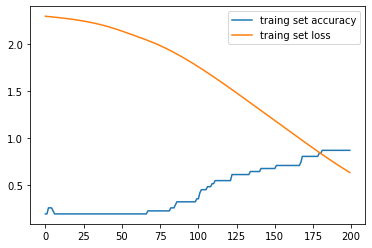

In [116]:
plt.plot(train.history['accuracy'],label='traing set accuracy')
plt.plot(train.history['loss'],label='traing set loss')
plt.legend()

In [ ]:
import random
while True:
    texts_p=[]
    prediction_input=input('You:')
    prediction_input=[letters.lower() for letters in prediction_input if letters not in string.punctuation ]
    prediction_input=''.join(prediction_input)
    texts_p.append(prediction_input)

    prediction_input=tokenizer.texts_to_sequences(texts_p)
    prediction_input=np.array(prediction_input).reshape(-1)
    prediction_input=pad_sequences([prediction_input],input_shape)

    output=model.predict(prediction_input)
    output=output.argmax()

    response_tag=le.inverse_transform([output])[0]
    print("Going Marry:",random.choice(responses[response_tag]))

    if response_tag=="goodbye":
        break
    

You:hi
1/1 [==============================] - 1s 1s/step
Going Marry: Hello
You:count of computer department lab
1/1 [==============================] - 0s 49ms/step
Going Marry: Total 12 Labs are available in computer department
You:number of labs available in computer department
1/1 [==============================] - 0s 48ms/step
Going Marry: Total 12 Labs are available in computer department
You:who is vice principal of college
1/1 [==============================] - 0s 59ms/step
Going Marry: Dr.M.D.Kokate is Principal of SNJB's KBJ College of Engineering Chandwad
You:give me library information
1/1 [==============================] - 0s 51ms/step
Going Marry: We have an excellent, attractive and pleasant ambiance library in the college. Library is located at first floor & Second floor of college building, having total area of 490 sq. mtr.
You:about library
1/1 [==============================] - 0s 46ms/step
Going Marry: We have an excellent, attractive and pleasant ambiance library in

In [44]:
%%writefile content1.json
{
  "intents": [
{
  "tag": "department",
  "pattern":[ "vision of computer department"],
  "response": "To empower young generations for significant contribution in the field of computer engineering through excellence in knowledge, technical education and innovation to cater the industrial demands and societal needs."},{
  "tag": "department",
  "pattern": ["mission of computer department"],
  "response": "To undertake collaborative training which offer opportunities for long term interaction with academia and industry."
},{
  "tag": "department",
  "pattern": ["Number of labs", "count of lab"],
  "response": "12"
},{
  "tag": "department",
  "pattern": ["Operating System Lab","OSL","os lab"],
  "response": "Operating System: Windows 7,Programming tools: Arduino IDE",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of Operating System Lab", "os lab(OSL)"],
  "response": "Area of Lab:. 66 Sq.m.",
  "link": "http://www.snjb.org/engineering/images/department/Operating_System_Lab.png"
},{
  "tag": "department",
  "pattern": ["Lab Incharge of operation system lab", "os lab"],
  "response":"Prof. P. N. Achaliya",
  "link": "http://www.snjb.org/engineering/images/department/Operating_System_Lab.png"
},{
  "tag": "department",
  "pattern": ["Software Laboratory","sl"],
  "response": "Programming Tools Anaconda Navigator,Python,Cisco Packet Tracer, Wireshark, Browsers: Mozilla Firefox, Google Chrome, ",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratoriess"
},{
  "tag": "department",
  "pattern":[ "Area of Software Laboratory" , "sl lab"],
  "response": "68 Sqm",
  "link": "http://www.snjb.org/engineering/images/department/LRM_EXPORT_20180820_211245imgFile5b7fbfc2b0165_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab Incharge SL Lab"],
  "response": "Prof. S. B. Ambhore",
  "link": "http://www.snjb.org/engineering/images/department/LRM_EXPORT_20180820_211245imgFile5b7fbfc2b0165_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Computer Networking Laboratory", "CNL"],
  "response": "Operating System Windows 7, Programming Tools: Sublime Editor, Java , Java MySQL Connector, Tomcat , XAMPP, Anaconda Navigator. Visual Studio Code, Turbo C++.",
  "link": "http://www.snjb.org/engineering/images/department/c2_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Area of Networking Laboratory" ,"CNL"],
  "response": "69 Sqm",
  "link": "http://www.snjb.org/engineering/images/department/c2_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab Incharge Networking lab", "CNL"],
  "response": "Prof. G. P. Dhomse",
  "link": "http://www.snjb.org/engineering/images/department/c2_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Computer Graphics Laboratory, CGL"],
  "response": ["Operating System WINDOWS 7, UBUNTU\nProgramming Tools: G++ (Graphics),Eclipse,Java,OpenGL,Turbo c,Python"],
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of CGL" , "Area of Computer graphics lab"],
  "response": "176.5 sq. m. (Combined Project Lab + GC Lab)",
  "link": "http://www.snjb.org/engineering/images/department/Comp_Lab_CGL_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab In-charge of computer graphics lab, CGL"],
  "response": "Prof. N. P. Bora",
  "link": "http://www.snjb.org/engineering/images/department/Comp_Lab_CGL_thumb.jpgg"
},{
  "tag": "department",
  "pattern": ["Computer Science Laboratory"],
  "response": "Programming Tools Anaconda Navigator,Python,Cisco Packet Tracer, Wireshark",
  "link": "http://www.snjb.org/engineering/images/department/Comp_CSL_Lab_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Area of computer science Laboratory, CSL lab"],
  "response": "95.14 Sqm",
  "link": "http://www.snjb.org/engineering/images/department/Comp_CSL_Lab_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab In-charge computer science lab"],
  "response": "Prof. R. R. Bha,
  "link": "http://www.snjb.org/engineering/images/department/Comp_CSL_Lab_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Programming Laboratory, PL lab"],
  "response": "Programming Tools Turbo C Eclipse,starUML ,Open MP,Open , CL,Java, Gcc Lib,Lex and Yacc,NASM Python,Mongo,DB,Winedit,Miktek2.9,Winrar,Wireshark,Tasm,Qt Creator, Apache Tomcat,MysqlVLC Media Player",
    "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of programing Laboratory"],
  "response": ["66 Sqm"],
  "link": "http://www.snjb.org/engineering/images/department/IMG_9770_thumb.JPG"
},{
  "tag": "department",
  "pattern": ["Lab In-charge of programming lab"],
  "response": "Prof. Pawar D. P.",
  "link": "http://www.snjb.org/engineering/images/department/IMG_9770_thumb.JPG"
},{
  "tag": "department",
  "pattern": ["Advance Programming Laboratory, APL lab"],
  "response": "Programming Tools: Turbo c, Eclipse, Java, Python,Juputer,Anaconda 3",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of programming Laboratory, apl lab"],
  "response": " 71.39 Sqm",
  "link": "http://www.snjb.org/engineering/images/department/apl.png"
},{
  "tag": "department",
  "pattern": ["Lab in-charge of advance programming lab, Lab in-charge of apl lab"],
  "response": " Prof. S. V. Sinha",
  "link": "http://www.snjb.org/engineering/images/department/apl.png"
},{
  "tag": "department",
  "pattern": ["result of computer deapartment"],
  "link": ["http://www.snjb.org/engineering/Computer_engineering/computer_engineering_results"]
},{
  "tag": "department",
  "pattern": ["toppers of compueter"],
    "response":"hoo",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_placements_statistics"
},{
  "tag": "department",
  "pattern": ["placement of 2022 computer department"],
  "response": "53 placement in 2022, 279 in last 5 years",
  "link": "http://www.snjb.org/engineering/images/department/Update_Placement_Summery_Computer_Per.png"
}]
}

Overwriting content1.json


In [ ]:
%%writefile content1.json
{
  "intents": [
{
  "tag": "department",
  "pattern":[ "vision of computer department"],
  "response": "To empower young generations for significant contribution in the field of computer engineering through excellence in knowledge, technical education and innovation to cater the industrial demands and societal needs."},{
  "tag": "department",
  "pattern": ["mission of computer department"],
  "response": "To undertake collaborative training which offer opportunities for long term interaction with academia and industry."
},{
  "tag": "department",
  "pattern": ["Number of labs", "count of lab"],
  "response": "12"
},{
  "tag": "department",
  "pattern": ["Operating System Lab","OSL","os lab"],
  "response": "Operating System: Windows 7,Programming tools: Arduino IDE",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of Operating System Lab", "os lab(OSL)"],
  "response": "Area of Lab:. 66 Sq.m.",
  "link": "http://www.snjb.org/engineering/images/department/Operating_System_Lab.png"
},{
  "tag": "department",
  "pattern": ["Lab Incharge of operation system lab", "os lab"],
  "response":"Prof. P. N. Achaliya",
  "link": "http://www.snjb.org/engineering/images/department/Operating_System_Lab.png"
},{
  "tag": "department",
  "pattern": ["Software Laboratory","sl"],
  "response": "Programming Tools Anaconda Navigator,Python,Cisco Packet Tracer, Wireshark, Browsers: Mozilla Firefox, Google Chrome, ",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratoriess"
},{
  "tag": "department",
  "pattern":[ "Area of Software Laboratory" , "sl lab"],
  "response": "68 Sqm"],
  "link": "http://www.snjb.org/engineering/images/department/LRM_EXPORT_20180820_211245imgFile5b7fbfc2b0165_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab Incharge SL Lab"],
  "response": ["Prof. S. B. Ambhore"],
  "link": "http://www.snjb.org/engineering/images/department/LRM_EXPORT_20180820_211245imgFile5b7fbfc2b0165_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Computer Networking Laboratory", "CNL"],
  "response": ["Operating System Windows 7, Programming Tools: Sublime Editor, Java , Java MySQL Connector, Tomcat , XAMPP, Anaconda Navigator. Visual Studio Code, Turbo C++."],
  "link": "http://www.snjb.org/engineering/images/department/c2_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Area of Networking Laboratory" ,"CNL"],
  "response": ["69 Sqm"],
  "link": "http://www.snjb.org/engineering/images/department/c2_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab Incharge Networking lab", "CNL"],
  "response": ["Prof. G. P. Dhomse"],
  "link": "http://www.snjb.org/engineering/images/department/c2_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Computer Graphics Laboratory, CGL"],
  "response": ["Operating System WINDOWS 7, UBUNTU\nProgramming Tools: G++ (Graphics),Eclipse,Java,OpenGL,Turbo c,Python"],
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of CGL" , "Area of Computer graphics lab"],
  "response": ["176.5 sq. m. (Combined Project Lab + GC Lab)"],
  "link": "http://www.snjb.org/engineering/images/department/Comp_Lab_CGL_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab In-charge of computer graphics lab, CGL"],
  "response": ["Prof. N. P. Bora"],
  "link": "http://www.snjb.org/engineering/images/department/Comp_Lab_CGL_thumb.jpgg"
},{
  "tag": "department",
  "pattern": ["Computer Science Laboratory"],
  "response": ["Programming Tools Anaconda Navigator,Python,Cisco Packet Tracer, Wireshark"],
  "link": "http://www.snjb.org/engineering/images/department/Comp_CSL_Lab_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Area of computer science Laboratory, CSL lab"],
  "response": ["95.14 Sqm"],
  "link": "http://www.snjb.org/engineering/images/department/Comp_CSL_Lab_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab In-charge computer science lab"],
  "response": ["Prof. R. R. Bhandari"],
  "link": "http://www.snjb.org/engineering/images/department/Comp_CSL_Lab_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Programming Laboratory, PL lab"],
  "response":[ "Programming Tools Turbo C Eclipse,starUML ,Open MP,Open , CL,Java, Gcc Lib,Lex and Yacc,NASM Python,Mongo,DB,Winedit,Miktek2.9,Winrar,Wireshark,Tasm,Qt Creator, Apache Tomcat,MysqlVLC Media Player"],
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of programing Laboratory"],
  "response": ["66 Sqm"],
  "link": "http://www.snjb.org/engineering/images/department/IMG_9770_thumb.JPG"
},{
  "tag": "department",
  "pattern": ["Lab In-charge of programming lab"],
  "response": ["Prof. Pawar D. P."],
  "link": "http://www.snjb.org/engineering/images/department/IMG_9770_thumb.JPG"
},{
  "tag": "department",
  "pattern": ["Advance Programming Laboratory, APL lab"],
  "response": ["Programming Tools: Turbo c, Eclipse, Java, Python,Juputer,Anaconda 3"],
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of programming Laboratory, apl lab"],
  "response": [" 71.39 Sqm"],
  "link": "http://www.snjb.org/engineering/images/department/apl.png"
},{
  "tag": "department",
  "pattern": ["Lab in-charge of advance programming lab, Lab in-charge of apl lab"],
  "response": [" Prof. S. V. Sinha"],
  "link": "http://www.snjb.org/engineering/images/department/apl.png"
},{
  "tag": "department",
  "pattern": ["result of computer deapartment"],
  "link": ["http://www.snjb.org/engineering/Computer_engineering/computer_engineering_results"]
},{
  "tag": "department",
  "pattern": ["toppers of compueter"],
    "response":["hoo"],
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_placements_statistics"
},{
  "tag": "department",
  "pattern": ["placement of 2022 computer department"],
  "response": ["53 placement in 2022, 279 in last 5 years"],
  "link": "http://www.snjb.org/engineering/images/department/Update_Placement_Summery_Computer_Per.png"
}]
}

In [46]:
%%writefile content1.json
{
  "intents": [
{
  "tag": "department",
  "pattern":[ "vision of computer department"],
  "response": "To empower young generations for significant contribution in the field of computer engineering through excellence in knowledge, technical education and innovation to cater the industrial demands and societal needs."},{
  "tag": "department",
  "pattern": ["mission of computer department"],
  "response": "To undertake collaborative training which offer opportunities for long term interaction with academia and industry."
},{
  "tag": "department",
  "pattern": ["Number of labs", "count of lab"],
  "response": "12"
},{
  "tag": "department",
  "pattern": ["Operating System Lab","OSL","os lab"],
  "response": "Operating System: Windows 7,Programming tools: Arduino IDE",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of Operating System Lab", "os lab(OSL)"],
  "response": "Area of Lab:. 66 Sq.m.",
  "link": "http://www.snjb.org/engineering/images/department/Operating_System_Lab.png"
},{
  "tag": "department",
  "pattern": ["Lab Incharge of operation system lab", "os lab"],
  "response":"Prof. P. N. Achaliya",
  "link": "http://www.snjb.org/engineering/images/department/Operating_System_Lab.png"
},{
  "tag": "department",
  "pattern": ["Software Laboratory","sl"],
  "response": "Programming Tools Anaconda Navigator,Python,Cisco Packet Tracer, Wireshark, Browsers: Mozilla Firefox, Google Chrome, ",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratoriess"
},{
  "tag": "department",
  "pattern":[ "Area of Software Laboratory" , "sl lab"],
  "response": "68 Sqm",
  "link": "http://www.snjb.org/engineering/images/department/LRM_EXPORT_20180820_211245imgFile5b7fbfc2b0165_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab Incharge SL Lab"],
  "response": "Prof. S. B. Ambhore",
  "link": "http://www.snjb.org/engineering/images/department/LRM_EXPORT_20180820_211245imgFile5b7fbfc2b0165_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Computer Networking Laboratory", "CNL"],
  "response": "Operating System Windows 7, Programming Tools: Sublime Editor, Java , Java MySQL Connector, Tomcat , XAMPP, Anaconda Navigator. Visual Studio Code, Turbo C++.",
  "link": "http://www.snjb.org/engineering/images/department/c2_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Area of Networking Laboratory" ,"CNL"],
  "response": "69 Sqm",
  "link": "http://www.snjb.org/engineering/images/department/c2_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab Incharge Networking lab", "CNL"],
  "response": "Prof. G. P. Dhomse",
  "link": "http://www.snjb.org/engineering/images/department/c2_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Computer Graphics Laboratory, CGL"],
  "response": ["Operating System WINDOWS 7, UBUNTU\nProgramming Tools: G++ (Graphics),Eclipse,Java,OpenGL,Turbo c,Python"],
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of CGL" , "Area of Computer graphics lab"],
  "response": "176.5 sq. m. (Combined Project Lab + GC Lab)",
  "link": "http://www.snjb.org/engineering/images/department/Comp_Lab_CGL_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab In-charge of computer graphics lab, CGL"],
  "response": "Prof. N. P. Bora",
  "link": "http://www.snjb.org/engineering/images/department/Comp_Lab_CGL_thumb.jpgg"
},{
  "tag": "department",
  "pattern": ["Computer Science Laboratory"],
  "response": "Programming Tools Anaconda Navigator,Python,Cisco Packet Tracer, Wireshark",
  "link": "http://www.snjb.org/engineering/images/department/Comp_CSL_Lab_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Area of computer science Laboratory, CSL lab"],
  "response": "95.14 Sqm",
  "link": "http://www.snjb.org/engineering/images/department/Comp_CSL_Lab_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Lab In-charge computer science lab"],
  "response": "Prof. R. R. Bha,
  "link": "http://www.snjb.org/engineering/images/department/Comp_CSL_Lab_thumb.jpg"
},{
  "tag": "department",
  "pattern": ["Programming Laboratory, PL lab"],
  "response": "Programming Tools Turbo C Eclipse,starUML ,Open MP,Open , CL,Java, Gcc Lib,Lex and Yacc,NASM Python,Mongo,DB,Winedit,Miktek2.9,Winrar,Wireshark,Tasm,Qt Creator, Apache Tomcat,MysqlVLC Media Player",
    "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of programing Laboratory"],
  "response": ["66 Sqm"],
  "link": "http://www.snjb.org/engineering/images/department/IMG_9770_thumb.JPG"
},{
  "tag": "department",
  "pattern": ["Lab In-charge of programming lab"],
  "response": "Prof. Pawar D. P.",
  "link": "http://www.snjb.org/engineering/images/department/IMG_9770_thumb.JPG"
},{
  "tag": "department",
  "pattern": ["Advance Programming Laboratory, APL lab"],
  "response": "Programming Tools: Turbo c, Eclipse, Java, Python,Juputer,Anaconda 3",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_laboratories"
},{
  "tag": "department",
  "pattern": ["Area of programming Laboratory, apl lab"],
  "response": " 71.39 Sqm",
  "link": "http://www.snjb.org/engineering/images/department/apl.png"
},{
  "tag": "department",
  "pattern": ["Lab in-charge of advance programming lab, Lab in-charge of apl lab"],
  "response": " Prof. S. V. Sinha",
  "link": "http://www.snjb.org/engineering/images/department/apl.png"
},{
  "tag": "department",
  "pattern": ["result of computer deapartment"],
  "link": ["http://www.snjb.org/engineering/Computer_engineering/computer_engineering_results"]
},{
  "tag": "department",
  "pattern": ["toppers of compueter"],
    "response":"hoo",
  "link": "http://www.snjb.org/engineering/Computer_engineering/computer_engineering_placements_statistics"
},{
  "tag": "department",
  "pattern": ["placement of 2022 computer department"],
  "response": "53 placement in 2022, 279 in last 5 years",
  "link": "http://www.snjb.org/engineering/images/department/Update_Placement_Summery_Computer_Per.png"
}]
}

Overwriting content1.json


In [47]:
with open("content1.json") as content:
    data1=json.load(content1)
data1

NameError: name 'content1' is not defined

<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\DELL\AppData\Local\Temp/ipykernel_16372/226236931.py:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  print(data1['intents'['pattern']])


TypeError: string indices must be integers

In [37]:
tags=[]
patterns=[]
responses={}
for intent in data1['intents']:
    responses[intent['tag']]=intent['response']
    for lines in intent['pattern']:
        patterns.extend(lines)
        tags.append(intent['tag'])

KeyError: 'response'